<a href="https://colab.research.google.com/github/krupa2002/ML_kdp/blob/main/House_Pricing_using_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost Regression Model

### About XGBoost

XGBoost, which stands for Extreme Gradient Boosting, is a powerful machine learning algorithm used for regression, classification, and ranking tasks. It's an implementation of gradient boosted decision trees designed for speed and performance. XGBoost has become very popular due to its high efficiency and predictive accuracy.

Imagine you work for a telecom company and need to predict which customers are likely to cancel their subscriptions. Initially, you might make predictions based on average customer behavior. However, you quickly realize that this approach has errors—some loyal customers are incorrectly flagged as potential churners, and vice versa.!
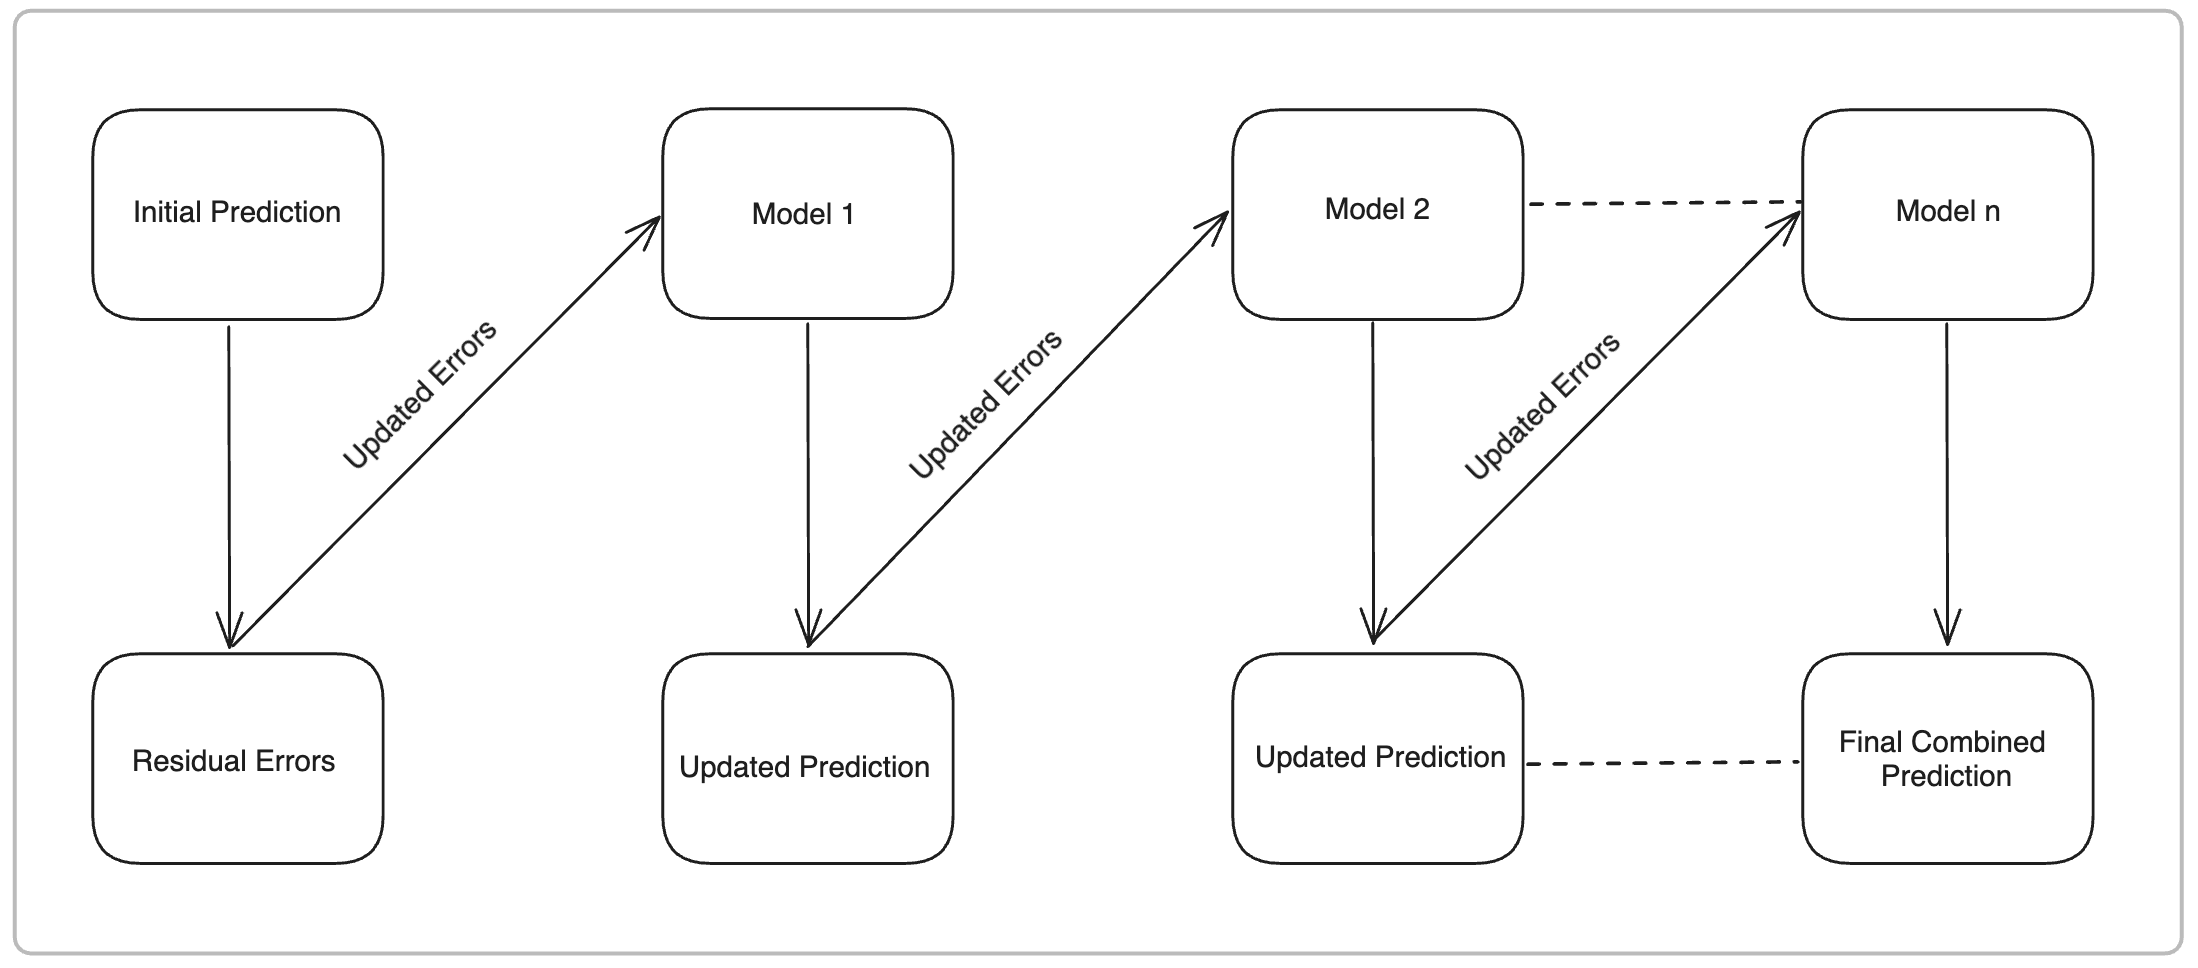




1. **Initial Prediction**: XGBoost starts with an initial prediction for each data point. This could be a simple average for regression or a probability estimate for classification.

2. **Calculate Residuals**: For each data point, calculate the difference (residual) between the predicted value and the actual target value.

3. **Fit a Model (Tree)**: XGBoost fits a decision tree to the residuals. The tree is trained to predict these residuals. This step involves finding the best split points in the data to minimize the residual error.

4. **Update Predictions**: Update the predictions by adding the predictions of the newly trained tree to the previous predictions. This step adjusts the model's predictions closer to the actual target values.

5. **Regularization**: Apply regularization techniques during tree construction to prevent overfitting. Regularization can include constraints on the tree structure (e.g., maximum depth), penalizing large weights (L1 and L2 regularization), or minimum child weight in a node.

6. **Iterative Process**: Repeat steps 2-5 iteratively, each time fitting a new tree to the residuals of the previous predictions. Each new tree focuses on reducing the remaining errors or residuals left by the previous trees.

7. **Final Prediction**: Combine the predictions from all the trees (ensemble) to get the final prediction. For regression, this could be the sum of the initial prediction and the predictions of all subsequent trees. For classification, it might involve averaging probabilities or using a voting mechanism.

8. **Early Stopping**: To prevent overfitting and improve efficiency, XGBoost can use early stopping. This means stopping the training process when adding more trees no longer improves performance on a validation dataset.


### 3 Main reasons why we use XGBoost-

1. **Performance**: XGBoost is fast and efficient, making it suitable for large datasets and real-time applications.
   
2. **Accuracy**: It consistently delivers high prediction accuracy, often outperforming other algorithms in machine learning competitions.

3. **Versatility**: XGBoost can be used for various machine learning tasks like classification, regression, and ranking, making it highly versatile in different domains.

### When we should XGBoost

1. **Complex Data Relationships**: XGBoost excels when dealing with complex relationships in data, such as nonlinear interactions between features, which traditional linear models may struggle to capture effectively.

2. **High Performance**: XGBoost is optimized for speed and efficiency, making it suitable for large datasets where quick model training and prediction times are essential.

3. **Accuracy**: It consistently delivers robust performance in predictive accuracy across various machine learning tasks, making it a reliable choice when precise predictions are paramount.

### Steps to implement XGBoost

1. **Data Preparation**: Load, clean, and preprocess your dataset (handling missing values and encoding categorical variables).
   
2. **Split Data**: Divide data into training and testing sets using `train_test_split`.

3. **Define Parameters**: Set XGBoost parameters (`objective`, `max_depth`, `learning_rate`, `n_estimators`, `subsample`, `colsample_bytree`).

4. **Create DMatrix**: Convert data into `DMatrix` format optimized for XGBoost.

5. **Train Model**: Initialize and train an XGBoost model (`xgb.train` for custom training or use `XGBRegressor`/`XGBClassifier` from `xgboost.sklearn`).

6. **Evaluate Model**: Use appropriate evaluation metrics (e.g., MSE, RMSE, MAE, R² for regression; accuracy, precision, recall, F1-score, AUC-ROC for classification).

7. **Parameter Tuning**: Optimize model performance through parameter tuning techniques like grid search or random search.

8. **Deploy Model**: Save and deploy the trained model for predictions on new data.

### Evaluation Metrics:

1. Regression: MSE, RMSE, MAE, R².
2. Classification: Accuracy, Precision, Recall, F1-score, AUC-ROC.

### Application

1. **Financial Risk Prediction**: XGBoost is used to predict credit default risk by analyzing large datasets with features like credit history, income, and loan amounts, achieving high accuracy and speed.
   
2. **Healthcare Diagnosis**: XGBoost aids in medical diagnostics by analyzing patient data (e.g., symptoms, test results) to predict diseases or conditions, facilitating early intervention and treatment planning.

### About dataset

Dataset Link - https://www.kaggle.com/datasets/gpandi007/usa-housing-dataset

# EDA

In [1]:
# Importing all necessary libraries
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Importing dataset
train = pd.read_csv('/content/housing_train.csv')
test = pd.read_csv('/content/housing_test.csv')

In [3]:
# head() shows 1st 5 rows
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Statistical Report of data
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Checking Null values
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
# Information about data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# printing missing values according to ascending values
missing_values = train.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


# Data Visualization

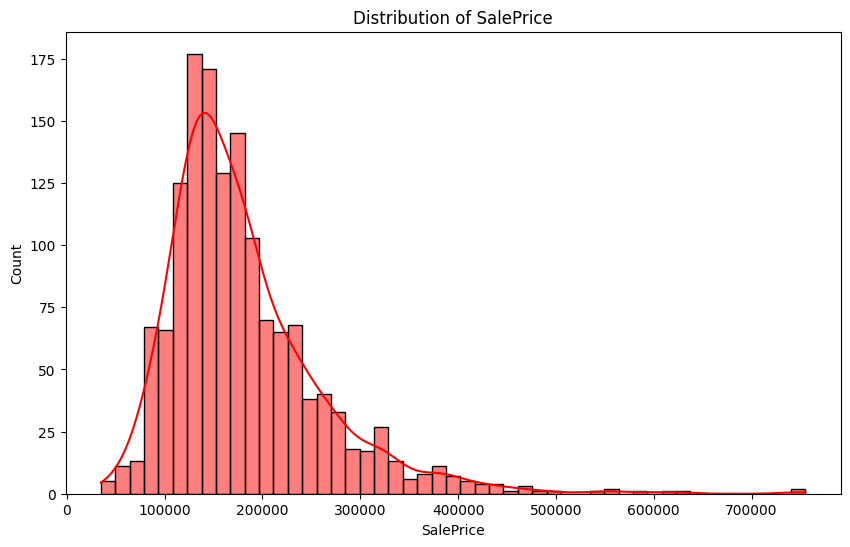

In [8]:
# Histogram plot to check Distribution of salesprice
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True, color = "red")
plt.title('Distribution of SalePrice')
plt.show()

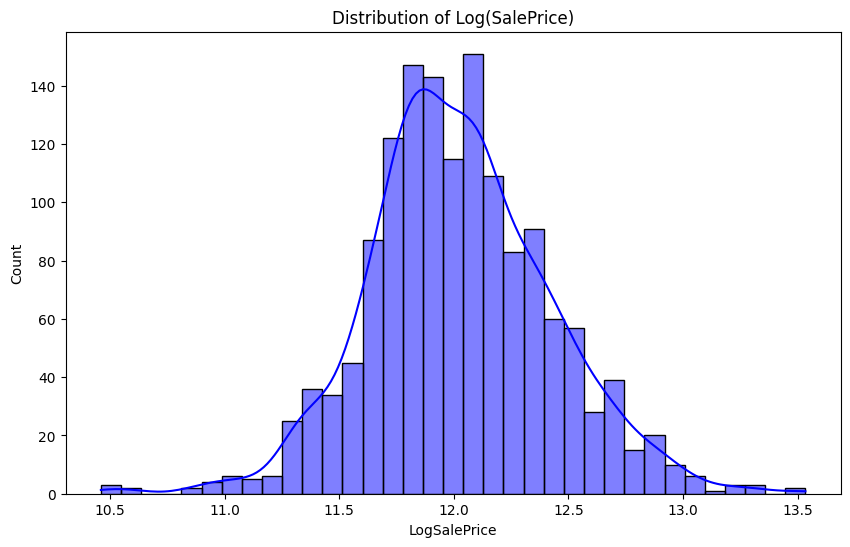

In [9]:
# Plotting Histogram to see distribution of LogSaleprice
train['LogSalePrice'] = np.log1p(train['SalePrice'])
plt.figure(figsize=(10, 6))
sns.histplot(train['LogSalePrice'], kde=True, color = "blue")
plt.title('Distribution of Log(SalePrice)')
plt.show()

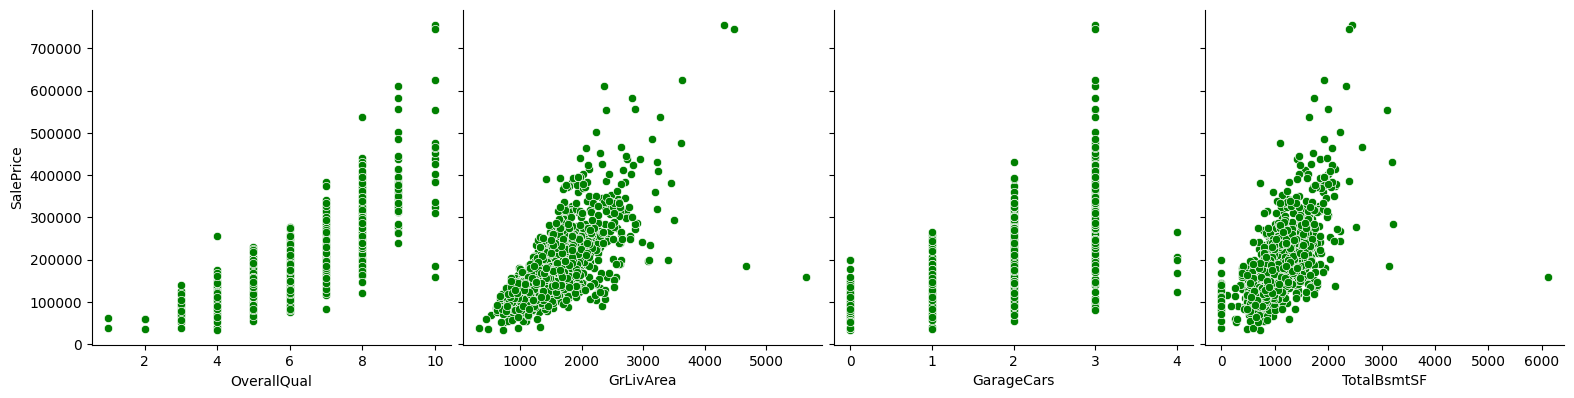

In [10]:
# Plotting Pairplot to understand the data distribution
numeric_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(train, x_vars=numeric_features, y_vars='SalePrice', height=4, aspect=1, kind='scatter',plot_kws={'color':'green'})
plt.show()

<ipython-input-11-781fc1e14059>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverallQual', y='SalePrice', data=train, palette='magma')


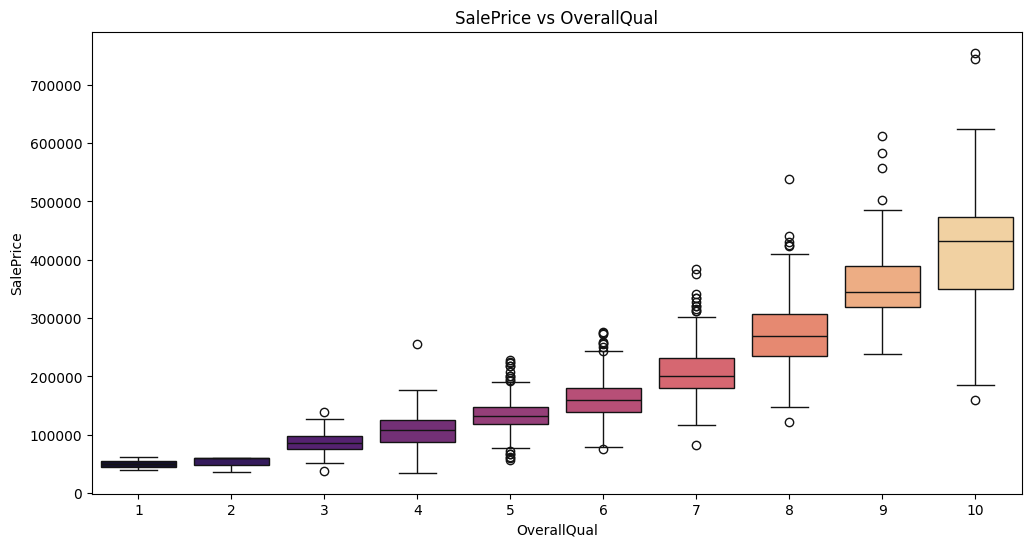

In [11]:
# Plotting Boxplot to understand the saleprice vs overallqual
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train, palette='magma')
plt.title('SalePrice vs OverallQual')
plt.show()

<ipython-input-12-74530655aa7d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Neighborhood', y='SalePrice', data=train, palette='pastel')


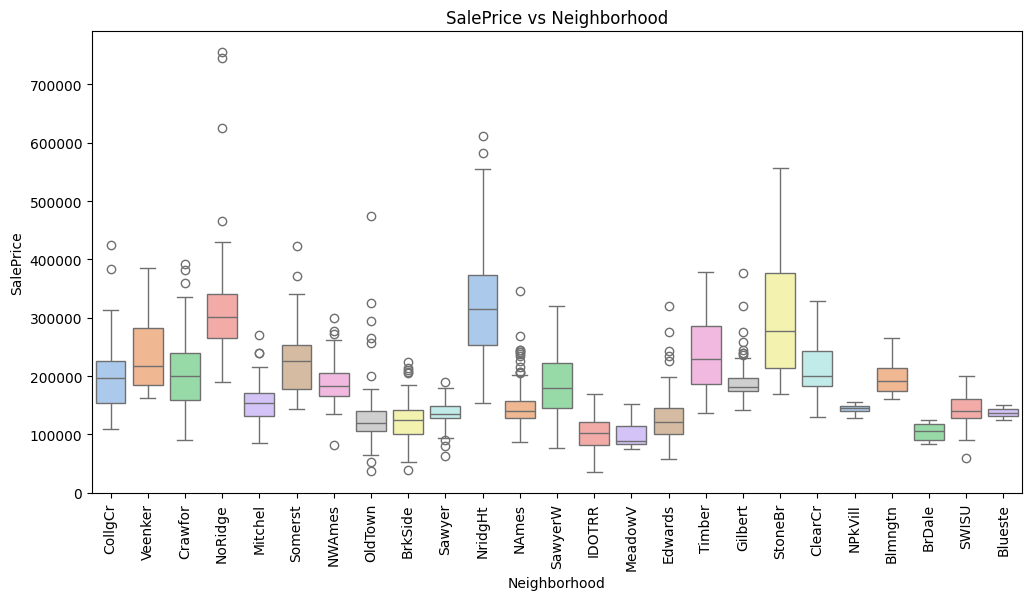

In [12]:
# Plotting boxplot to understand the saleprice vs distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train, palette='pastel')
plt.title('SalePrice vs Neighborhood')
plt.xticks(rotation=90)
plt.show()

In [13]:
# Removing the unwanted columns
train = train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
test = test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)


In [14]:
# Fill missing values in categorical columns with the mode and in numerical columns with the median for the training set.

for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = train[col].fillna(train[col].mode()[0])
    else:
        train[col] = train[col].fillna(train[col].median())

for col in test.columns:
    if test[col].dtype == 'object':
        test[col] = test[col].fillna(test[col].mode()[0])
    else:
        test[col] = test[col].fillna(test[col].median())

# Model Building

In [15]:
# Converts categories to numeric labels.
label_encoders = {}
for col in train.columns:
    if train[col].dtype == 'object':
        le = LabelEncoder()
        train[col] = le.fit_transform(train[col])
        label_encoders[col] = le

for col in test.columns:
    if test[col].dtype == 'object' and col in label_encoders:
        le = label_encoders[col]
        test[col] = le.transform(test[col])
    elif test[col].dtype == 'object':
        le = LabelEncoder()
        test[col] = le.fit_transform(test[col])
        label_encoders[col] = le

In [22]:
# Drop 'Id' and 'SalePrice' columns from the training set to create feature set X.
X = train.drop(['Id', 'SalePrice'], axis=1)
# Drop 'Id' column from the test set to create feature set X_test.
X_test = test.drop(['Id'], axis=1)
# Align the columns of X and X_test to ensure they have the same columns in the same order.
X, X_test = X.align(X_test, join='inner', axis=1)

In [23]:
# Extract the target variable 'SalePrice' from the training set and store it in y.
y = train['SalePrice']

In [24]:
# Ensure that the feature columns in X and X_test are identical; raise an error if they are not.
assert X.columns.tolist() == X_test.columns.tolist(), "Feature mismatch between train and test data"

In [25]:
# Split the data into training and validation sets, with 20% of the data used for validation.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# The random_state ensures reproducibility of the split.

In [26]:
# Create DMatrix objects for the training and validation sets with their respective labels for use in XGBoost.
# Create a DMatrix object for the test set without labels.
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test)



In [27]:
# Define parameters for XGBoost regression model.
# Set number of boosting rounds to 100.
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

num_rounds = 100


In [28]:
# Train an XGBoost model using specified parameters on the training set.
# Monitor performance on the validation set ('eval'), with early stopping if no improvement after 10 rounds.

bst = xgb.train(params, dtrain, num_rounds, evals=[(dval, 'eval')], early_stopping_rounds=10)


[0]	eval-rmse:81538.87180
[1]	eval-rmse:76120.58527
[2]	eval-rmse:71195.10321
[3]	eval-rmse:66575.51904
[4]	eval-rmse:62406.90732
[5]	eval-rmse:58425.23415
[6]	eval-rmse:54957.86670
[7]	eval-rmse:51932.05329
[8]	eval-rmse:49167.52333
[9]	eval-rmse:46627.57656
[10]	eval-rmse:44284.42835
[11]	eval-rmse:42270.06194
[12]	eval-rmse:40555.14265
[13]	eval-rmse:38945.21063
[14]	eval-rmse:37454.05770
[15]	eval-rmse:36081.95575
[16]	eval-rmse:35244.15416
[17]	eval-rmse:34203.60252
[18]	eval-rmse:33295.06571
[19]	eval-rmse:32503.75406
[20]	eval-rmse:31829.93661
[21]	eval-rmse:31142.45861
[22]	eval-rmse:30471.62762
[23]	eval-rmse:29925.54246
[24]	eval-rmse:29485.50514
[25]	eval-rmse:28965.88338
[26]	eval-rmse:28570.24390
[27]	eval-rmse:28214.37439
[28]	eval-rmse:28036.78640
[29]	eval-rmse:27812.10813
[30]	eval-rmse:27656.84943
[31]	eval-rmse:27623.74299
[32]	eval-rmse:27396.36295
[33]	eval-rmse:27303.65550
[34]	eval-rmse:27158.52479
[35]	eval-rmse:27029.53789
[36]	eval-rmse:26869.68941
[37]	eval-r

# Evaluation Metrics

In [29]:
# Predict target values for the validation set using the trained XGBoost model.
# Calculate Root Mean Squared Error (RMSE) to evaluate model performance on the validation set.
y_pred = bst.predict(dval)
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 25640.0090


In [30]:
# Predict target values for the test set using the trained XGBoost model.
y_test_pred = bst.predict(dval)

In [31]:
# Predicted target values for the test set using the trained XGBoost model.
y_test_pred

array([142111.55 , 326711.3  , 111217.67 , 163753.4  , 344777.22 ,
        78697.14 , 228495.73 , 147030.97 ,  78506.81 , 132807.4  ,
       152249.25 , 122441.44 , 125898.7  , 196150.38 , 171128.38 ,
       129977.375, 195701.8  , 138934.88 , 120216.734, 224298.9  ,
       163849.69 , 225862.7  , 180133.81 , 134593.78 , 196662.27 ,
       166153.02 , 188502.02 , 103243.01 , 174995.12 , 190943.64 ,
       130380.69 , 264185.8  , 202029.64 , 113930.89 , 254787.02 ,
       146748.38 , 131653.02 , 209594.86 , 307512.53 , 106894.02 ,
       122373.09 , 239834.66 , 116661.59 , 346607.84 , 126433.98 ,
       149762.7  , 109458.36 , 129279.766, 400654.3  , 135731.3  ,
       123239.305, 214399.28 , 127172.055, 314773.62 , 142979.98 ,
       267896.97 , 200176.8  , 154117.33 , 131279.7  , 113229.805,
        73865.016, 157958.17 , 321379.4  , 311466.34 , 278154.7  ,
       226795.45 , 113617.28 , 310363.97 , 114089.77 , 159847.61 ,
       123787.41 , 127122.195, 111256.29 ,  82467.53 , 495948.

In [32]:
# Calculate Mean Squared Error (MSE) between actual and predicted values on the validation set.
mse = mean_squared_error(y_val, y_pred)
# Calculate Root Mean Squared Error (RMSE) between actual and predicted values on the validation set.
rmse = mean_squared_error(y_val, y_pred, squared=False)
# Calculate Mean Absolute Error (MAE) between actual and predicted values on the validation set.
mae = mean_absolute_error(y_val, y_pred)
# Calculate R-squared (R2) score between actual and predicted values on the validation set.
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 657410061.4963
Root Mean Squared Error (RMSE): 25640.0090
Mean Absolute Error (MAE): 15908.9463
R-squared (R²): 0.9143


In [33]:
# Predict target values for the test set using the trained XGBoost model.
y_test_pred = bst.predict(dtest)
